In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#폰트 한글로 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

In [3]:
#데이터 불러오기
df = pd.read_csv('공공자전거 이용정보.csv', header= 0, encoding='cp949')
df

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,NaN,~10대,2,28.90,0.23,992.78,13
1,2021-01-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,NaN,~10대,1,34.38,0.26,1127.50,10
2,2021-01-01,0,1168,1168. 마곡엠밸리10단지 앞,정기권,NaN,~10대,1,0.00,0.00,0.00,7
3,2021-01-01,0,2619,2619. 석촌고분역 4번출구,정기권,NaN,~10대,1,38.75,0.38,1658.34,14
4,2021-01-01,0,536,536. 행당역 2번출구 앞,정기권,NaN,~10대,1,12.96,0.17,743.88,5
...,...,...,...,...,...,...,...,...,...,...,...,...
718852,2021-01-31,23,207,207. 여의나루역 1번출구 앞,단체권,NaN,~10대,5,916.66,8.66,37335.95,219
718853,2021-01-31,23,3549,3549.건영아파트 앞,단체권,NaN,20대,2,492.87,4.51,19447.10,133
718854,2021-01-31,23,248,248. 초원아파트 앞,단체권,NaN,20대,2,348.43,2.91,12569.64,90
718855,2021-01-31,23,131,131. 증산2교,단체권,NaN,20대,2,98.10,0.77,3302.87,20


In [4]:
# 데이터 컬럼을 영어로 변환
col_list = ['date','rent_hour','st_id','st_name','ticket','gender','age','count','amount','carbon','distance','use_time']
df.columns = col_list
df

,date,rent_hour,st_id,st_name,ticket,gender,age,count,amount,carbon,distance,use_time
0,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,NaN,~10대,2,28.90,0.23,992.78,13
1,2021-01-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,NaN,~10대,1,34.38,0.26,1127.50,10
2,2021-01-01,0,1168,1168. 마곡엠밸리10단지 앞,정기권,NaN,~10대,1,0.00,0.00,0.00,7
3,2021-01-01,0,2619,2619. 석촌고분역 4번출구,정기권,NaN,~10대,1,38.75,0.38,1658.34,14
4,2021-01-01,0,536,536. 행당역 2번출구 앞,정기권,NaN,~10대,1,12.96,0.17,743.88,5
...,...,...,...,...,...,...,...,...,...,...,...,...
718852,2021-01-31,23,207,207. 여의나루역 1번출구 앞,단체권,NaN,~10대,5,916.66,8.66,37335.95,219
718853,2021-01-31,23,3549,3549.건영아파트 앞,단체권,NaN,20대,2,492.87,4.51,19447.10,133
718854,2021-01-31,23,248,248. 초원아파트 앞,단체권,NaN,20대,2,348.43,2.91,12569.64,90
718855,2021-01-31,23,131,131. 증산2교,단체권,NaN,20대,2,98.10,0.77,3302.87,20


In [6]:
#대여일자 데이터타입을 datetime으로 변환
df['date'] = pd.to_datetime(df['date'],format='%Y-%m-%d')
# 한 컬럼씩 하기 위해서는 dt연산자 이용
#확인, dt 중간에 말고 그냥 year.month.day 써주면 된다
test_df = df.loc[0]
test_df.date.year
# 한 컬럼씩 하기 위해서는 dt연산자 이용
df['date'].dt.day

0          1
1          1
2          1
3          1
4          1
          ..
718852    31
718853    31
718854    31
718855    31
718856    31
Name: date, Length: 718857, dtype: int64

In [7]:
#gender Nan => Both
df['gender'] = df['gender'].fillna('both')
#f => F, m=> M
df['gender'].replace('f','F',inplace=True)
df['gender'].replace('m','M',inplace=True)
df['gender'].value_counts()

both    317622
M       262689
F       138546
Name: gender, dtype: int64

In [8]:
#age 컬럼정리 
age_values = set(df['age'])
age_values

{'20대', '30대', '40대', '50대', '60대', '70대~', '~10대'}

In [9]:
# \N => 0으로 처리 후 float 변환
df['amount']=df['amount'].replace('\\N',0)
df['carbon'] = df['carbon'].replace('\\N',0)

df['amount']=df['amount'].astype(float)
df['carbon'] = df['carbon'].astype(float)

In [11]:
# 0 이외의 순수데이터 
df_pure = df[~(df['amount']== 0 ) |~(df['carbon']== 0 )]
#변화 컬럼들 데이터 타입 float로 변환
df_pure['amount'] = df_pure['amount'].astype(float)
df_pure['carbon'] = df_pure['carbon'].astype(float)

C:\Users\yng12\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [13]:
df_zero = df[df['amount']==0]
index_list = df_zero.index


In [16]:
#연령대,성별 리스트 만들어주기
age_list=df['age'].unique().tolist()
gender_list = df['gender'].unique().tolist()

In [1]:
# 특정 카테고리로 분류해서 특정 데이터 평균 구하는 함수
def get_mean_by(user_info,target,column):
    mean_target = df.groupby(target)[column].mean()
    return mean_target

In [18]:
#df_pure, mean=> amount, carbon, distance
mean_amount_pure = get_mean_by(df_pure,['age','gender'],'amount')
mean_carbon_pure = get_mean_by(df_pure,['age','gender'],'carbon')
mean_distance_pure = get_mean_by(df_pure,['age','gender'],'distance')

In [19]:
mean_amount_pure

age   gender
20대   F          72.095058
      M          82.558618
      both       79.095264
30대   F          70.032107
      M          79.493367
      both       77.114530
40대   F          77.495092
      M          89.615768
      both       86.491221
50대   F          86.613764
      M          89.000946
      both       85.985221
60대   F          95.928050
      M          88.040707
      both       89.816589
70대~  F          66.376349
      M          78.515146
      both       78.878413
~10대  F         109.249312
      M         101.791986
      both       87.066974
Name: amount, dtype: float64

In [20]:
#결측값=>0 으로 된 데이타에 순수 데이터의 평균들을 조건에 맞춰서 넣어주는 함수
def new_fill_mean(df):
    df_zero = df[df['amount']==0]
    index_list = df_zero.index
    age_list = df.age.unique().tolist()
    gender_list = df.gender.unique().tolist()
    
    for age in age_list:
        
        for gender in gender_list:
            
            avg_amount = mean_amount_pure[age][gender]
            avg_carbon = mean_carbon_pure[age][gender]
            avg_distance = mean_distance_pure[age][gender]
        
            df.loc[(df.age==age)&(df.gender==gender)&(df.amount==0),'amount'] = avg_amount
            df.loc[(df.age==age)&(df.gender==gender)&(df.carbon==0),'carbon'] = avg_carbon
            df.loc[(df.age==age)&(df.gender==gender)&(df.distance==0),'distance'] = avg_distance

In [21]:
# df함수에 적용
new_fill_mean(df)

In [22]:
df

,date,rent_hour,st_id,st_name,ticket,gender,age,count,amount,carbon,distance,use_time
0,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,both,~10대,2,28.900000,0.230000,992.780000,13
1,2021-01-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,both,~10대,1,34.380000,0.260000,1127.500000,10
2,2021-01-01,0,1168,1168. 마곡엠밸리10단지 앞,정기권,both,~10대,1,87.066974,0.787233,3393.373662,7
3,2021-01-01,0,2619,2619. 석촌고분역 4번출구,정기권,both,~10대,1,38.750000,0.380000,1658.340000,14
4,2021-01-01,0,536,536. 행당역 2번출구 앞,정기권,both,~10대,1,12.960000,0.170000,743.880000,5
...,...,...,...,...,...,...,...,...,...,...,...,...
718852,2021-01-31,23,207,207. 여의나루역 1번출구 앞,단체권,both,~10대,5,916.660000,8.660000,37335.950000,219
718853,2021-01-31,23,3549,3549.건영아파트 앞,단체권,both,20대,2,492.870000,4.510000,19447.100000,133
718854,2021-01-31,23,248,248. 초원아파트 앞,단체권,both,20대,2,348.430000,2.910000,12569.640000,90
718855,2021-01-31,23,131,131. 증산2교,단체권,both,20대,2,98.100000,0.770000,3302.870000,20


In [24]:
get_mean_by(df,['age','gender'],'amount')

age   gender
20대   F          79.825797
      M          91.856598
      both       87.593530
30대   F          77.510243
      M          88.563622
      both       85.476462
40대   F          85.783450
      M          99.523330
      both       95.747474
50대   F          95.822876
      M          98.665842
      both       94.938140
60대   F         105.525764
      M          97.738197
      both      100.062091
70대~  F          75.401203
      M          88.043456
      both       86.600775
~10대  F         119.880957
      M         113.532560
      both       96.610645
Name: amount, dtype: float64

In [25]:
# 요일 설정후 요일 컬럼 만들어줌
df['weekday'] = df['date'].dt.day_name()

In [26]:
#대여소 데이터 불러오기
df_st = pd.read_csv('공공자전거 대여소 정보.csv',encoding='cp949')


In [27]:
# 대여소 데이터 컬럼을 영어로 바꿔줌
col_list2 = ['st_id','st_name','region','address','latitude','longitude','equip_time','num_lcd','num_qr','st_type']
df_st.columns = col_list2

#대여소 데이터 줄 정리
df_st = df_st.loc[4:2157]

#대여소 데이터 , Nan값을 0으로 바꿔준다
df_st = df_st.fillna(0)

#대여소 아이디를 float=> int 값으로 바꿔준다
df_st['st_id'] = df_st['st_id'].astype(int)

df_st

,st_id,st_name,region,address,latitude,longitude,equip_time,num_lcd,num_qr,st_type
4,301,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130,37.575794,126.971451,2015-10-07,16,0,LCD
5,302,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130,37.575947,126.974060,2015-10-07,12,0,LCD
6,303,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189,37.571770,126.974663,2015-10-07,8,0,LCD
7,304,광화문역 2번출구 앞,종로구,서울특별시 종로구 세종대로 지하172,37.572113,126.977577,2021-01-26,0,7,QR
8,305,종로구청 옆,종로구,서울특별시 종로구 삼봉로 43,37.572582,126.978355,2015-10-07,16,0,LCD
...,...,...,...,...,...,...,...,...,...,...
2153,1085,래미안 솔베뉴(고덕로),강동구,양재대로1650,37.554569,127.145874,2020-01-13,0,20,QR
2154,1086,래미안 솔베뉴(구천면로),강동구,양재대로1650,37.550598,127.145454,2020-01-10,0,10,QR
2155,1088,풍납사거리(강동),강동구,성내동451-3,37.528122,127.119522,2020-01-14,0,12,QR
2156,1089,고덕 래미안힐스테이트(201동),강동구,고덕동 675,37.560600,127.146698,2020-01-13,0,10,QR


In [28]:
# 데이터 병합
df = pd.merge(df,df_st[['st_id','region','latitude','longitude']],how='inner',on='st_id')


In [29]:
df[['amount','carbon','distance']] = round(df[['amount','carbon','distance']],2)

In [30]:
df

,date,rent_hour,st_id,st_name,ticket,gender,age,count,amount,carbon,distance,use_time,weekday,region,latitude,longitude
0,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,both,~10대,2,28.90,0.23,992.78,13,Friday,성북구,37.607105,127.021500
1,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,both,20대,1,11.24,0.07,283.72,1,Friday,성북구,37.607105,127.021500
2,2021-01-01,2,1347,1347. 길음래미안아파트817동 상가 앞,일일권,both,20대,1,42.24,0.43,1839.04,37,Friday,성북구,37.607105,127.021500
3,2021-01-01,2,1347,1347. 길음래미안아파트817동 상가 앞,일일권,M,20대,2,50.75,0.44,1912.72,73,Friday,성북구,37.607105,127.021500
4,2021-01-01,5,1347,1347. 길음래미안아파트817동 상가 앞,일일권,M,~10대,1,183.65,1.66,7134.79,47,Friday,성북구,37.607105,127.021500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717585,2021-01-31,15,1627,1627. 수락산역 4번출구,일일권,both,20대,1,83.95,0.76,3261.30,32,Sunday,노원구,37.676941,127.055099
717586,2021-01-31,15,1627,1627. 수락산역 4번출구,일일권,F,20대,1,83.48,0.72,3100.00,32,Sunday,노원구,37.676941,127.055099
717587,2021-01-31,17,1627,1627. 수락산역 4번출구,정기권,both,30대,1,77.11,0.65,2807.76,10,Sunday,노원구,37.676941,127.055099
717588,2021-01-31,18,1627,1627. 수락산역 4번출구,정기권,F,20대,1,72.19,0.70,3038.28,32,Sunday,노원구,37.676941,127.055099


### 1.연령별 현황 조회
    1.평균 운동량
    2.평균 탄소량
    3.평균 이동거리
    4. 평균 사용시간

In [31]:
# 평균 함수=> (데이터프레임,원하는 카테고리 별,특정컬럼) 내림차순
def getMeanByTarget(dataframe,target,column):
    mean_target = dataframe.groupby(target)[column].mean().sort_values(ascending=False)
    return mean_target

#연령별 평균 데이터 
getMeanByTarget(df,'age','amount')

age
~10대    107.523525
60대     100.091726
50대      96.815565
40대      95.853469
20대      87.490108
30대      85.184405
70대~     84.782627
Name: amount, dtype: float64

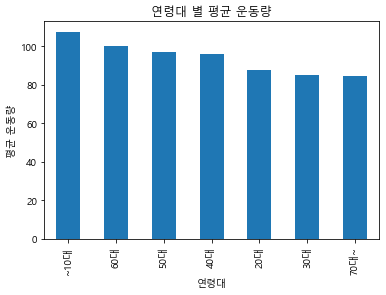

In [32]:
# 평균 groupby 데이터 받아서 그래프로 출력하는 함수
# x
def getGraph(mean_data,x,y):
    
    mean_data.plot.bar()
    
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title('%s 별 %s' %(x,y)) 
#     plt.show()
    plt.savefig('%s 별 %s' %(x,y))
#그래프 함수 테스트
getGraph(getMeanByTarget(df,'age','amount'),x='연령대',y='평균 운동량')

In [33]:
# 플롯 그리는 함수
def getPlot(mean_data,x,y):
    
    plt.figure(figsize=(12,6))
    plt.plot(mean_data)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title('%s 별 %s' %(x,y))
    plt.savefig('%s 별 %s' %(x,y))
#     plt.show()

### 이용자 평균 데이터 현황 그래프

In [35]:
def mean_graph_list():
    target_list = ['amount', 'carbon', 'distance', 'use_time']
    name_list = ['평균 운동량', '평균 탄소감축량', '평균 이동거리', '평균 사용 시간']
    for i in range(len(target_list)):
        plt.figure(figsize=(15,6))
        plt.subplot(2, 2, i+1)
        
        mean_target = df.groupby('age')[target_list[i]].mean().sort_values(ascending=False)
        plt.savefig('이용자 평균 데이터 %s.png' %(i))

        graph_bar = mean_target.plot.bar()
    
        graph_bar.set_xlabel('연령대')
        graph_bar.set_ylabel(name_list[i])
        graph_bar.set_title('%s 별 %s' %('연령대',name_list[i])) 
#         plt.savefig('이용자 평균 데이터')
#         getGraph(getMeanByTarget(
#             df, 'age', target_list[i]), x='연령대', y=name_list[i])

In [36]:
#
def mean_graph_list_save():
    target_list = ['amount', 'carbon', 'distance', 'use_time']
    name_list = ['평균 운동량', '평균 탄소감축량', '평균 이동거리', '평균 사용 시간']
    for i in range(len(target_list)):
        img_path = '연령대 별 %s' %(name_list[i])
        plt.figure(figsize=(15,6))
        mean_target = df.groupby('age')[target_list[i]].mean().sort_values(ascending=False)
        mean_target.plot.bar()
        plt.xlabel('연령대')
        plt.ylabel(name_list[i])
        plt.title('%s 별 %s' %('연령대',name_list[i]))
#         img_path = '/'+ img_path
        
        plt.savefig(img_path)

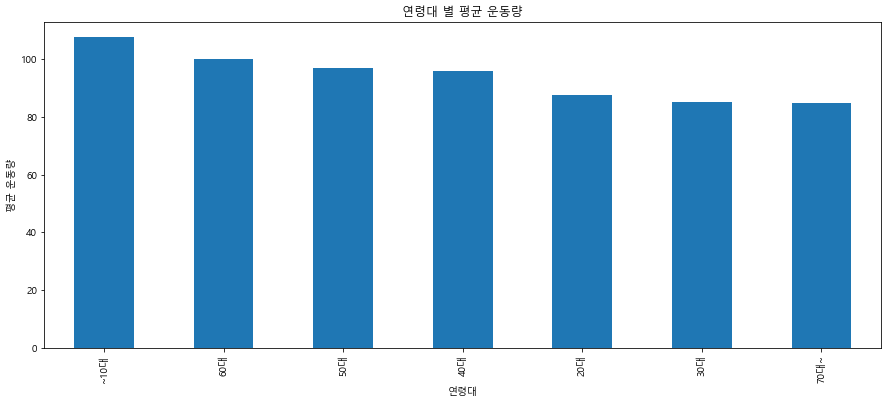

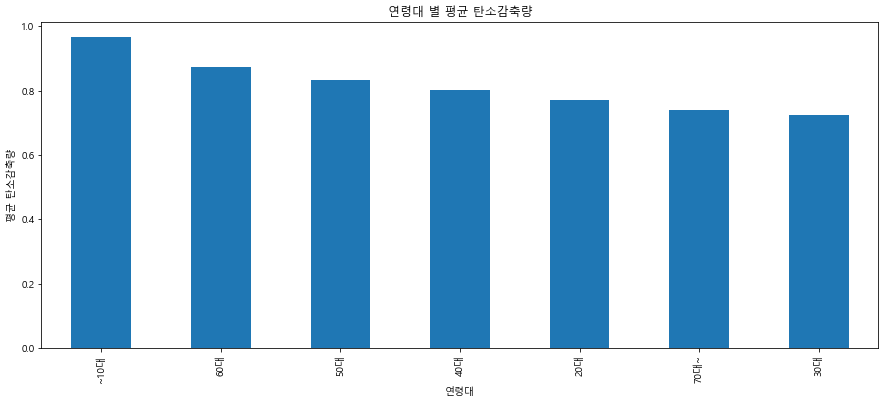

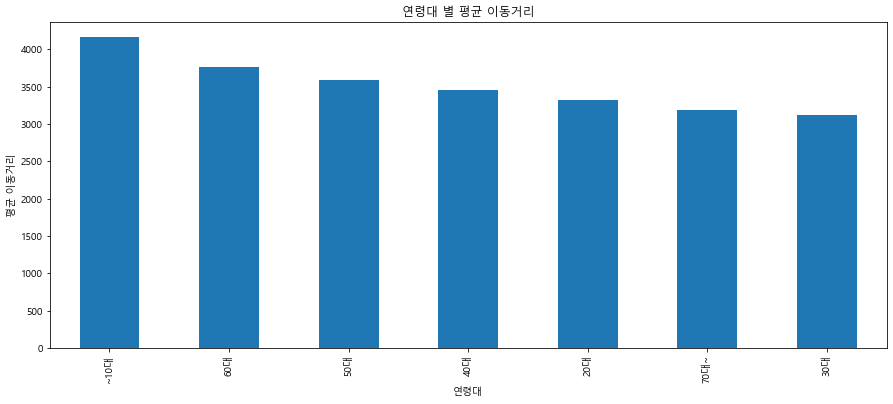

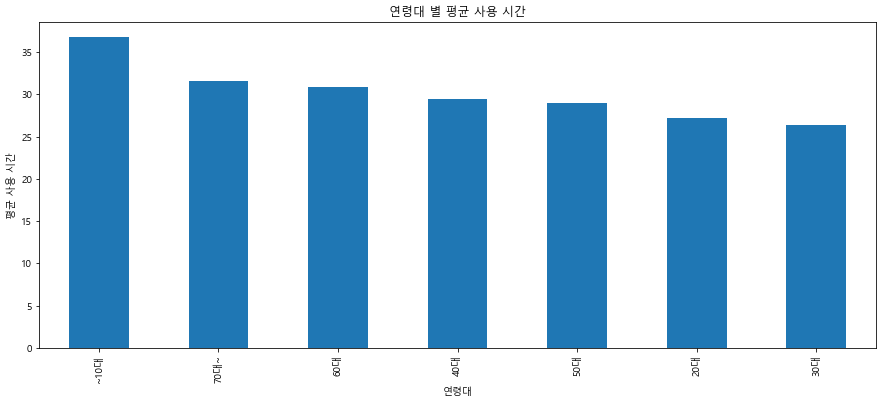

In [37]:
mean_graph_list_save()

### 2. 대여일 별 사용 현황 조회

    1. 대여건수
    2. 연령별 사용량
    3. 성별별 사용량 
    4. 평균 운동량

#### 2-1 .대여일별 대여건수

In [39]:
#요일 컬럼에 순서를 준다  reindex() 사용
weekday_index = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

In [2]:
# count함수
def getCountByTarget(dataframe,target,column):
    
    count_val = dataframe.groupby(target)[column].count()
    return count_val

In [3]:
# 특정데이터 전부 합해주는 함수
def getSumByTarget(dataframe,target,column):
    
    sum_val = dataframe.groupby(target)[column].sum()
    return sum_val

In [42]:
#대여일별 대여건수
use_by_weekday=df.groupby('weekday')['count'].sum()
use_by_weekday

weekday
Friday       120198
Monday       123317
Saturday     124745
Sunday       137024
Thursday      60047
Tuesday       93752
Wednesday    122645
Name: count, dtype: int64

In [43]:
#대여일별 대여건수
getSumByTarget(df,'weekday','count').reindex(weekday_index)

weekday
Monday       123317
Tuesday       93752
Wednesday    122645
Thursday      60047
Friday       120198
Saturday     124745
Sunday       137024
Name: count, dtype: int64

In [44]:
#대여일별 대여건수 그래프 (요일별로)
def plot_count_weekday():
    getPlot(getSumByTarget(df,'weekday','count').reindex(weekday_index),x='요일별',y='사용건수')

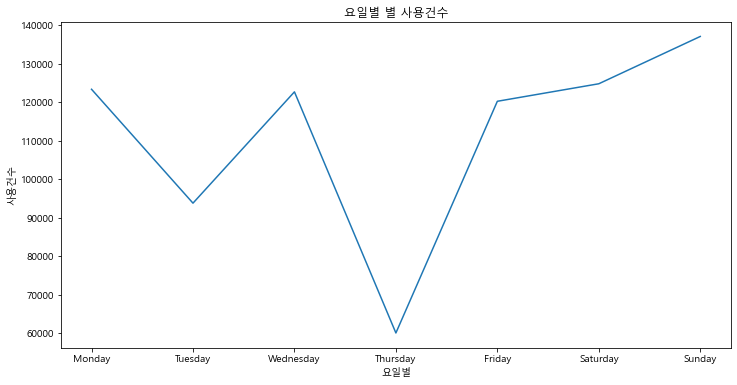

In [45]:
plot_count_weekday()

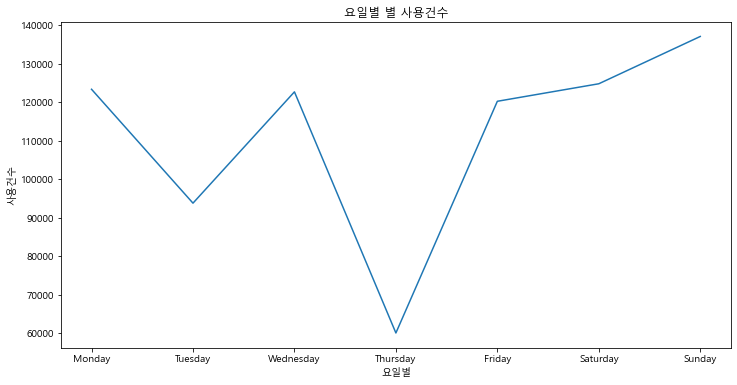

In [46]:
#대여일별 대여건수 그래프 (요일별로)
getPlot(getSumByTarget(df,'weekday','count').reindex(weekday_index),x='요일별',y='사용건수')

#### 2-2. 대여일별 연령별 사용건수

In [4]:
#연령별로 인덱스 순서 설정
age_index =['~10대','20대','30대','40대','50대','60대','70대~']

In [47]:
#대여일별 연령별 사용건수
# use_by_age_weekday = df.groupby(['weekday','age'])['use_num'].count()
# reindex.([순서리스트],level=해당 인덱스)
sum_age_week=getSumByTarget(df,['weekday','age'],'count').reindex(weekday_index,level='weekday')
#한번더 reindex 통해서 age 컬럼 순서
sum_age_week.reindex(age_index,level='age')

NameError: name 'age_index' is not defined

#### 2-2. 대여일별 연령별 사용건수 그래프

Text(0.5, 1.0, '대여일별 연령별 사용건수 ')

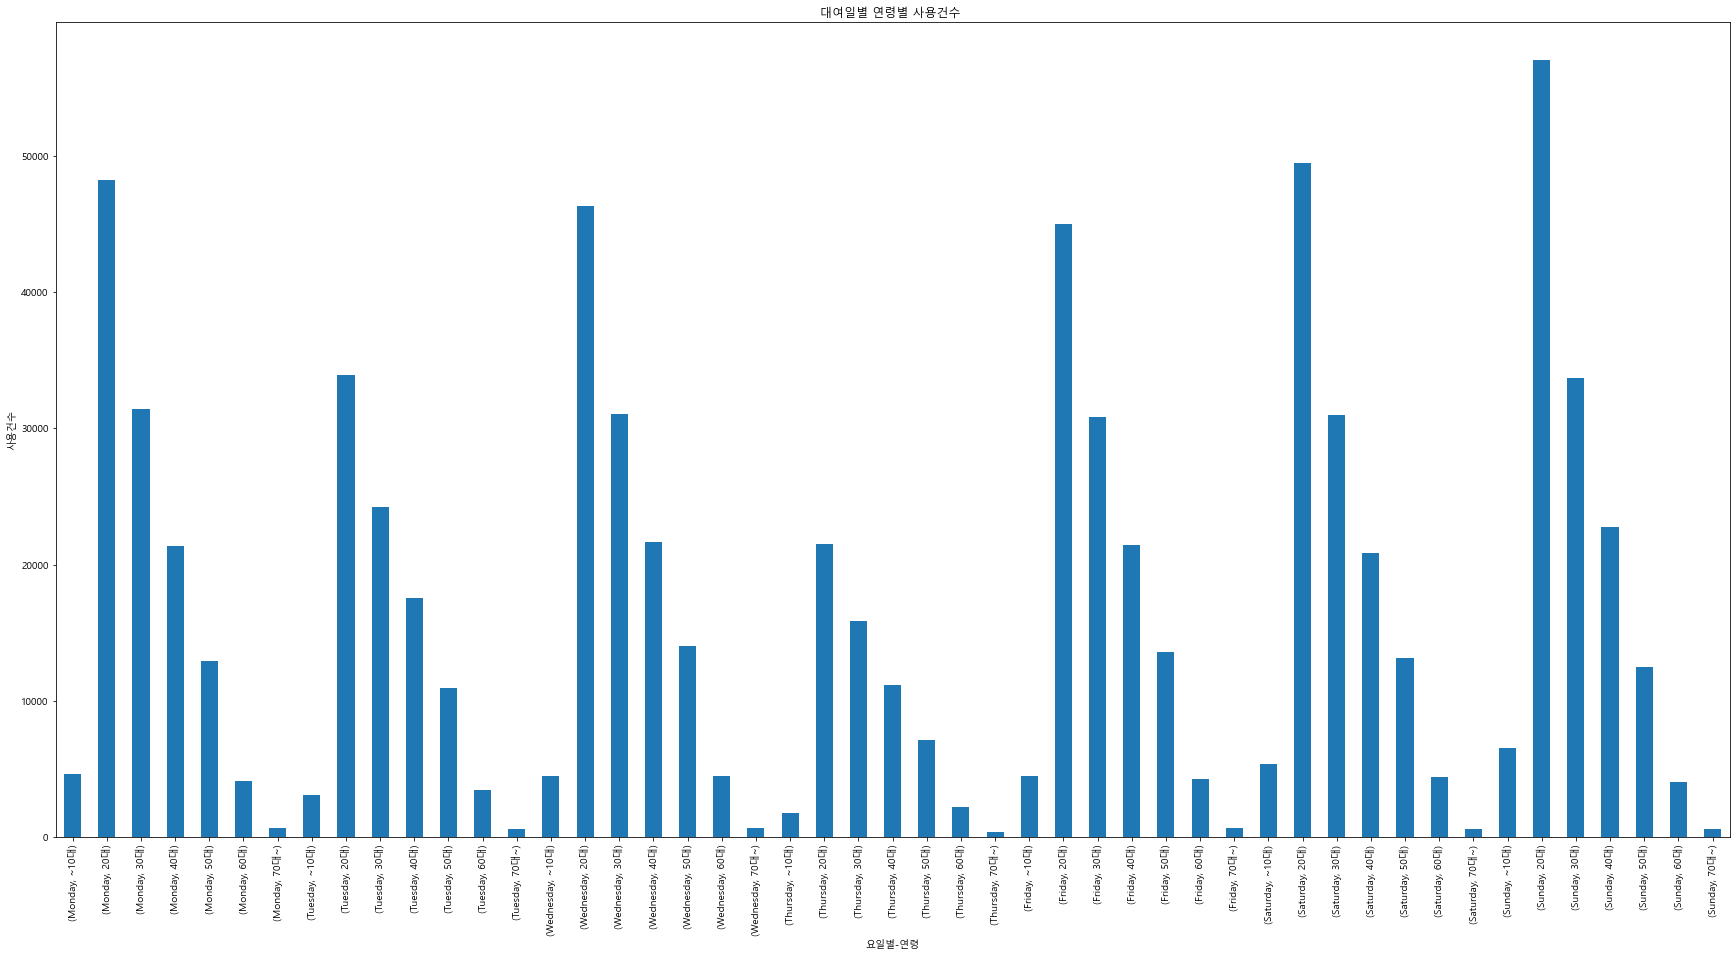

In [72]:
sum_bar1=sum_age_week.reindex(age_index,level='age').plot.bar()
sum_bar1.set_xlabel('요일별-연령')
sum_bar1.set_ylabel('사용건수')
sum_bar1.set_title('대여일별 연령별 사용건수 ')

## ! 위의 그래프 seaborn 으로 좀 더 가시성 높게 해줘야됨!

#### 2-3.대여일별 성별별 사용량

In [73]:
#대여일별 성별별 사용건수
sum_gender_week=getSumByTarget(df,['weekday','gender'],'count').reindex(weekday_index,level='weekday')
sum_gender_week

weekday    gender
Monday     F         23127
           M         44166
           both      56024
Tuesday    F         16592
           M         34927
           both      42233
Wednesday  F         23441
           M         43847
           both      55357
Thursday   F         10035
           M         22692
           both      27320
Friday     F         21594
           M         44575
           both      54029
Saturday   F         24696
           M         44368
           both      55681
Sunday     F         28477
           M         47210
           both      61337
Name: count, dtype: int64

Text(0.5, 1.0, '대여일별 성별별 사용건수 ')

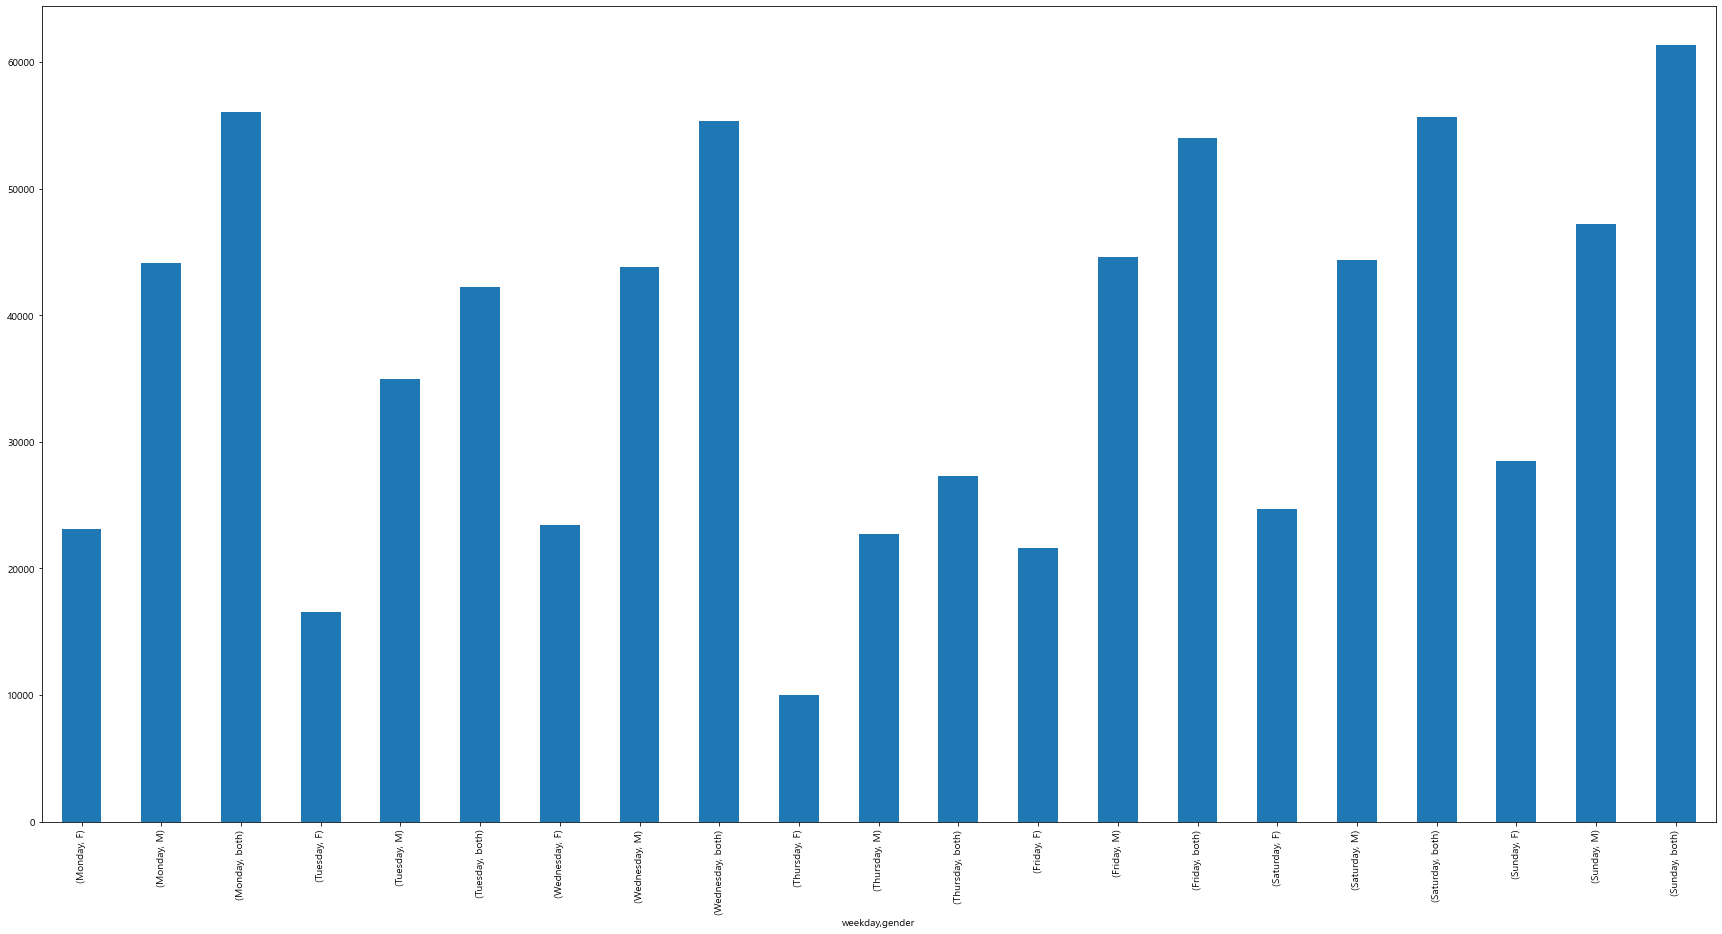

In [75]:
#대여일별 성별별  사용건수 그래프
sum_bar2 = sum_gender_week.plot.bar()
sum_bar1.set_xlabel('요일별-성별')
sum_bar1.set_ylabel('사용건수')
sum_bar1.set_title('대여일별 성별별 사용건수 ')

#### 2-4. 요일별 평균 운동량

In [48]:
#요일별 평균 운동량 그래프 
def plot_mean_amount_weekday():
    # 요일별 평균 운동량
    mean_amount_week=getMeanByTarget(df,'weekday','amount').reindex(weekday_index)
    getPlot(mean_amount_week,'요일','평균 운동량')

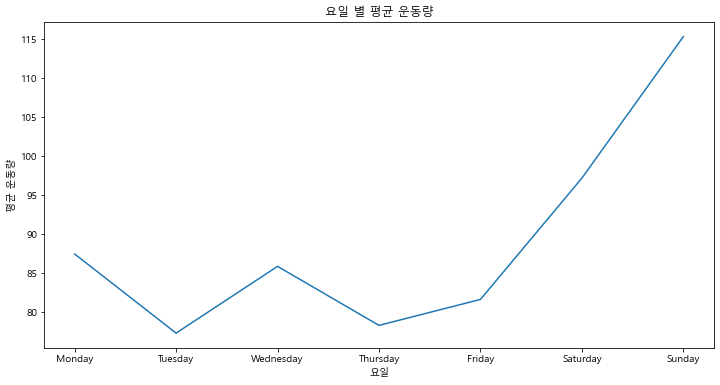

In [49]:
# 위 함수 테스트
plot_mean_amount_weekday()

In [50]:
# 요일별 평균 운동량
mean_amount_week=getMeanByTarget(df,'weekday','amount').reindex(weekday_index)
mean_amount_week

weekday
Monday        87.393798
Tuesday       77.240229
Wednesday     85.801606
Thursday      78.233208
Friday        81.560352
Saturday      97.120597
Sunday       115.272849
Name: amount, dtype: float64

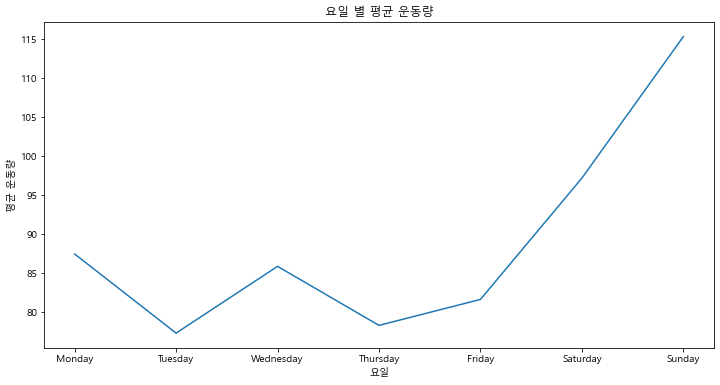

In [51]:
#요일별 평균 운동량 그래프 
getPlot(mean_amount_week,'요일','평균 운동량')

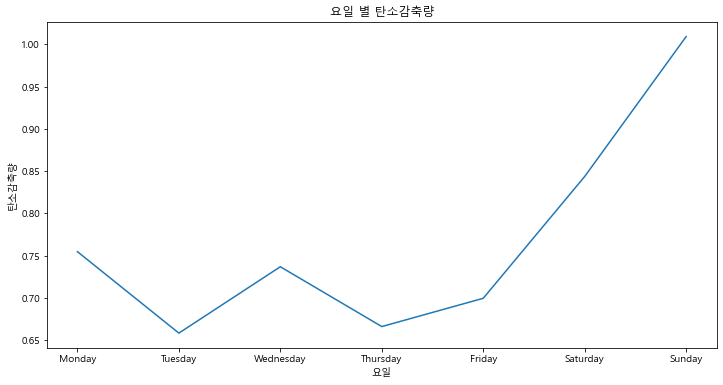

In [52]:
getPlot(getMeanByTarget(df,'weekday','carbon').reindex(weekday_index),x='요일',y='탄소감축량')


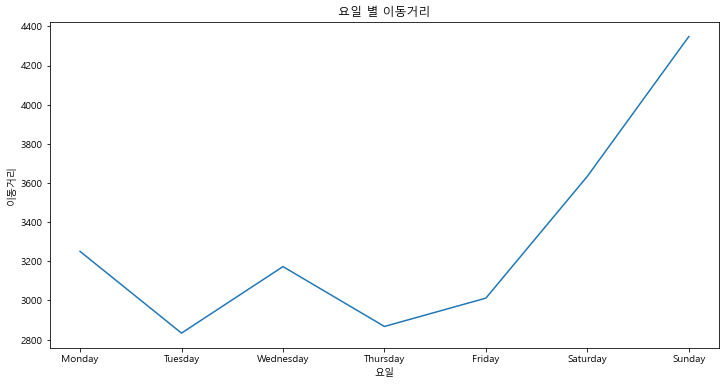

In [53]:
getPlot(getMeanByTarget(df,'weekday','distance').reindex(weekday_index),x='요일',y='이동거리')


#### 2-5. 요일 별 평균 사용시간

In [54]:
#요일별 평균 사용시간 함수 + 그래프
def plot_mean_time_week():
    #요일 별 평균 사용시간 
    mean_time_week = getMeanByTarget(df,'weekday','use_time').reindex(weekday_index)
    #요일 별 평균 사용시간 그래프 
    getPlot(mean_time_week,x='요일',y='평균 사용시간')

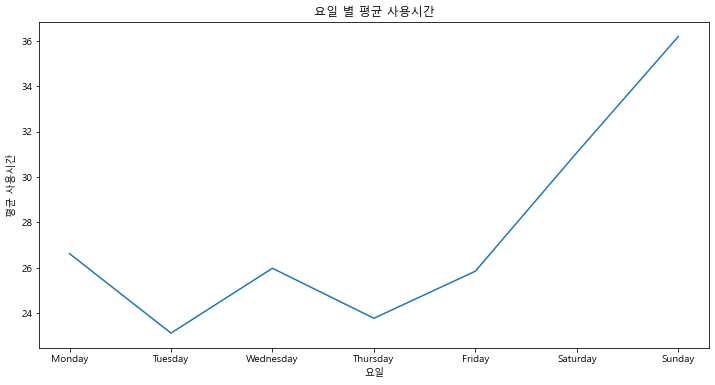

In [55]:
#위 함수 테스트
plot_mean_time_week()

### 3. 시간대별 사용 현황 조회
    1. 평균 대여수
    2. 평균 사용시간

In [58]:
def getSumByTarget(dataframe,target,column):
    
    sum_val = dataframe.groupby(target)[column].sum()
    return sum_val

In [59]:
# 시간대별 평균 대여수
def plot_mean_count_hour():
    # 평균 대여수 : 시간대별 이용건수 / 1월달 일자
    mean_count_time=getSumByTarget(df,'rent_hour','count')/len(df['date'].unique())
    # 평균 대여수 그래프 
    getPlot(mean_count_time,'시간대','평균 대여건수')

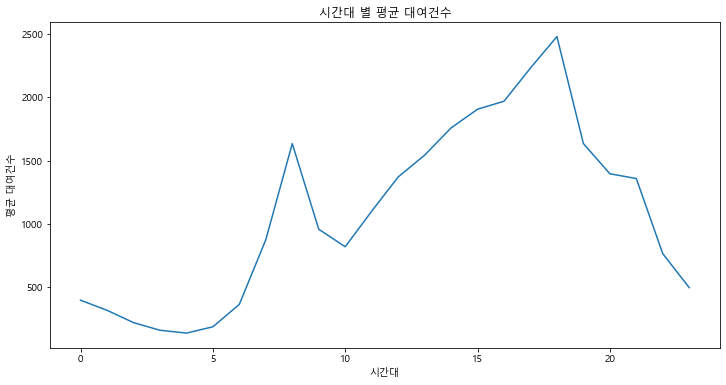

In [60]:
#위 함수 테스트
plot_mean_count_hour()

#### 3-2. 시간대 별 평균 사용시간


In [63]:
# 시간대별 평균 사용시간 
def plot_mean_time_hour():
    # 시간대별 평균 사용시간 
    mean_hour_time = getSumByTarget(df,'rent_hour','use_time')/getCountByTarget(df,'rent_hour','use_time')
    #시간대별 평균 사용시간 
    getPlot(mean_hour_time,'시간대','평균 사용시간')

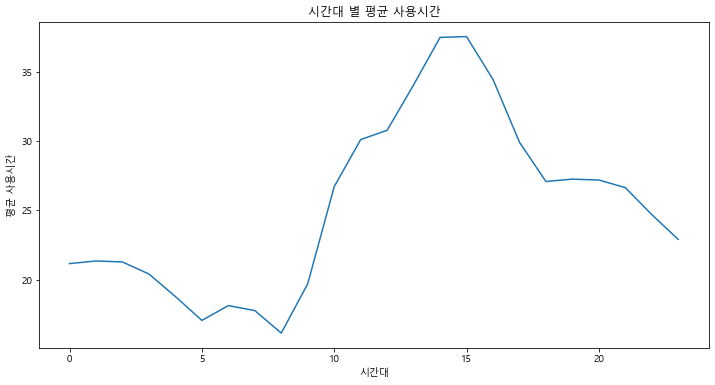

In [64]:
# 위함수 테스트
plot_mean_time_hour()

### 4. 자치구 별 현황
    1.자치구 별 총 이용자
    2.자치구 별 시간대 별 이용 현황
    3.자치구 별 연령대 별 이용 현황

In [75]:
# 평균 groupby 데이터 받아서 그래프로 출력하는 함수
# x
def getGraphV(mean_data,x,y):
    
    plt.figure(figsize=(15,6))
    mean_data.plot.barh()
    
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title('%s 별 %s' %(y,x)) 
#     plt.show()
    plt.savefig('%s 별 %s' %(y,x))


In [76]:
#자치구별 총 이용자 함수 + 그래프 
def graph_total_user():
    #1달 자치구 별 총 이용자 
    count_region=getCountByTarget(df,'region','count').sort_values(ascending=True)
    getGraphV(count_region,'총 이용자 수','자치구')

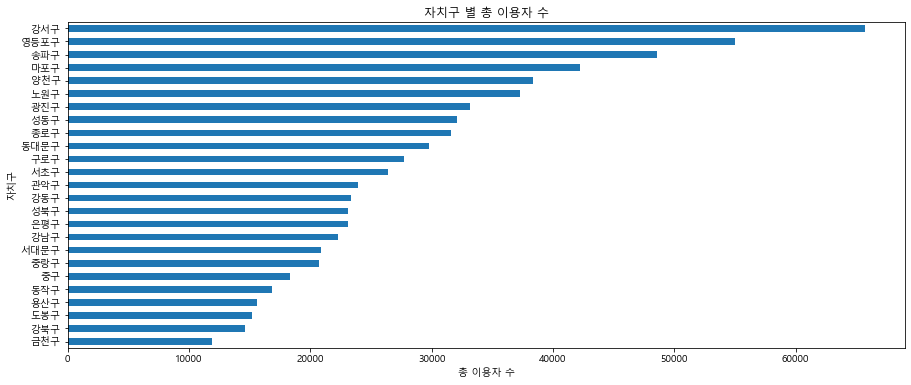

In [77]:
#위함수 테스트
graph_total_user()

In [80]:
#자치구별 총 이용자 함수 + 그래프 
def graph_total_carbon():
    #1달 자치구 별 총 이용자 
    count_region=getSumByTarget(df,'region','carbon').sort_values(ascending=True)
    getGraphV(count_region,'탄소감축량','자치구')

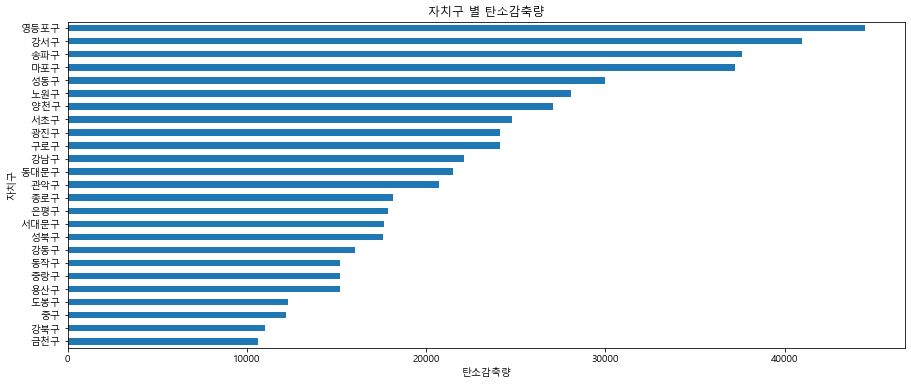

In [81]:
graph_total_carbon()

### 6.사용자 이용내역관련 비교 데이터

In [132]:
# target 에는 연령별, 시간대별, 요일별 등등
# my_info 에는 데이터프레임 한줄, 즉 특정유저데이터 프레임 한줄
# x에는 주석을 달아주는거니까 target에 해당하는걸 한글로 age 라면 연령대
# y에는 column에 해당하는걸 한글로 amount 라면 운동량
def compare_graph(target,my_info,x):
    column_list = ['amount','carbon','distance','use_time']
    y = ['운동량','탄소감축량','이동거리','사용시간']
    for i in range(len(column_list)):
        mean_data = getMeanByTarget(df,target,column_list[i])
        
#       fig, ax = plt.subplots(1,len(my_info),i+1,figsize=(15,6))
        plt.figure(figsize=(15,6))    
        mean_data.plot.bar()
        plt.xlabel(x)
        plt.ylabel(y[i])
        plt.title('%s 별 평균 %s' %(x,y[i]))
        plt.axhline(my_info[column_list[i]], linewidth=2, color='red',label='내 {}'.format(y[i]))
        plt.axhline(df[df[target]==my_info[target]][column_list[i]].mean(), color='green',label='나와 비슷한 {} {}'.format(x,y[i]))
        plt.legend()
        plt.savefig('내 %s 별 평균 %s  과의 비교' %(x,y[i]))

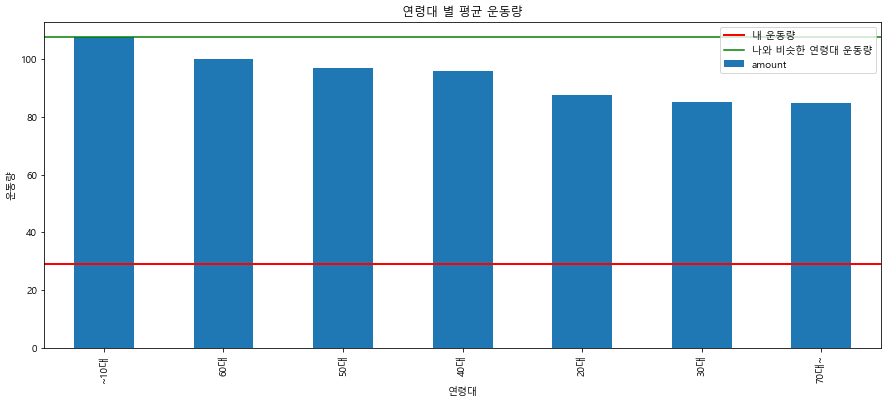

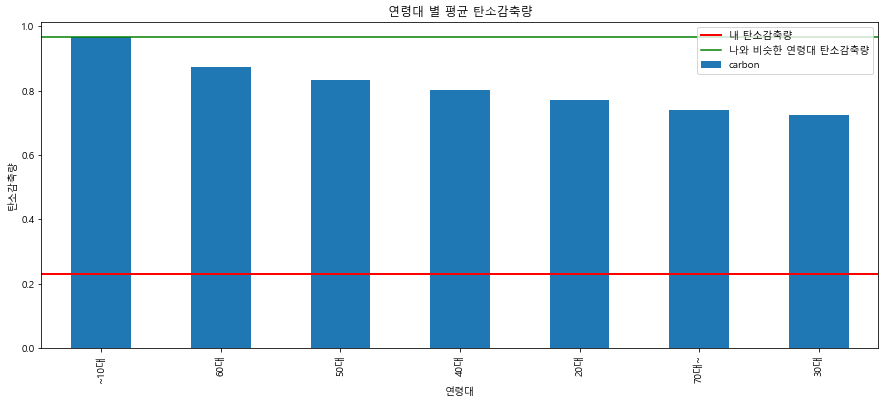

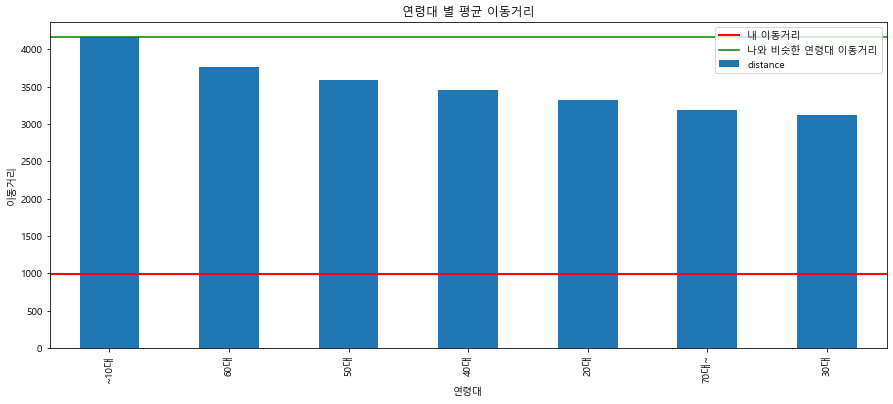

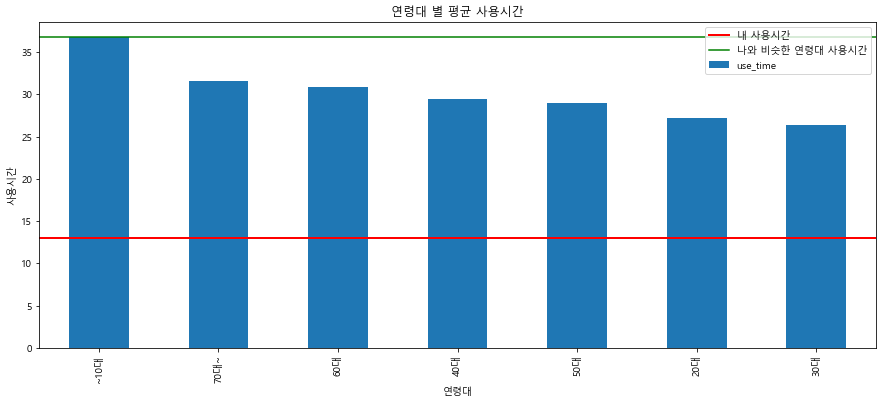

In [133]:
# 테스트 유저로 df 첫번째 줄에 위치한 유저 정보입력
#위함수 테스트 my_info자리에 한줄로 입력되어야함
compare_graph('age',df.loc[0],'연령대')

In [136]:
#성별별 연령별 평균 데이터
def graph_list_by_type():
    target_list = ['amount', 'carbon', 'distance', 'use_time']
    name_list = ['평균 운동량', '평균 탄소감축량', '평균 이동거리', '평균 사용 시간']
    for i in range(len(target_list)):
#       fig,axes=plt.subplots(1,4)
        plt.subplots(figsize=(15,6))
        ax= sns.barplot(data=df,x='gender',y=target_list[i],hue='age')
        ax.set(xlabel='성별',ylabel=name_list[i],title='성별별 연령별 %s' %(name_list[i]))
        plt.savefig('성별별 연령별 %s' %(name_list[i]))
    

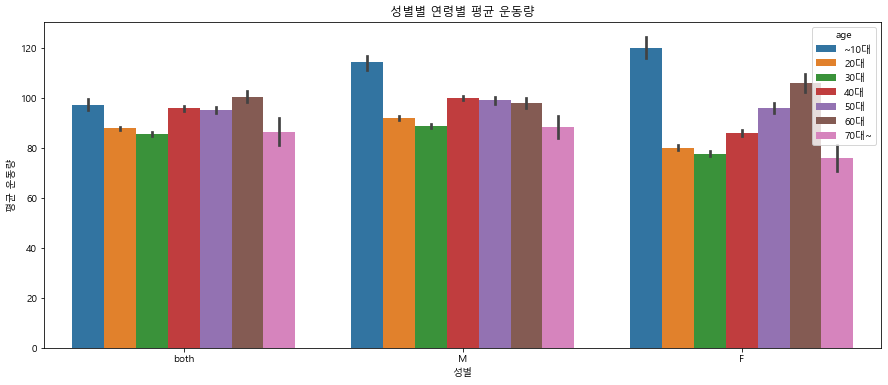

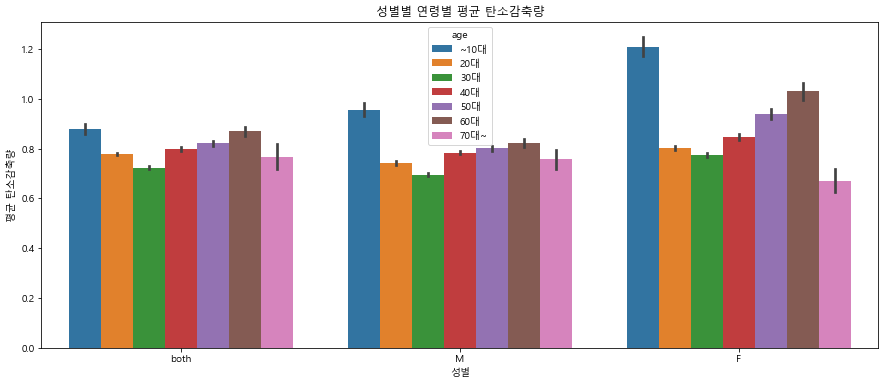

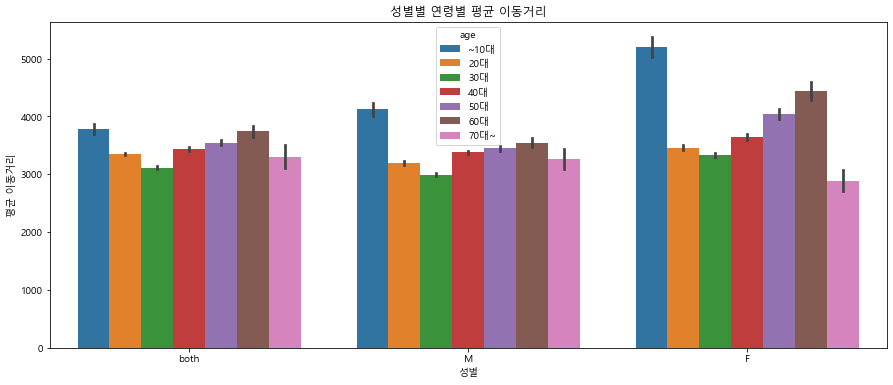

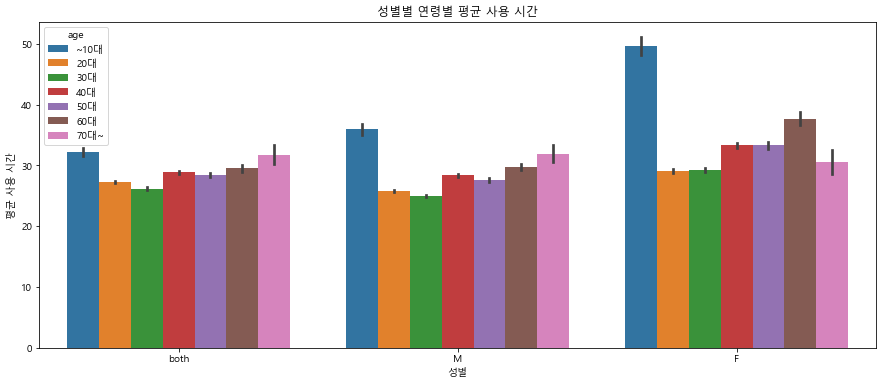

In [137]:
#위 함수 테스트
graph_list_by_type()

In [138]:
def graph_count_day_age():
    plt.figure(figsize=(15,6))
    ax = sns.barplot(data=df,x='weekday',y='count',hue='age',estimator=sum)
    ax.set(xlabel='요일별',ylabel='사용건수',title='요일별 연령별 평균 사용건수')
    plt.savefig('요일별 연령별 평균 사용건수')

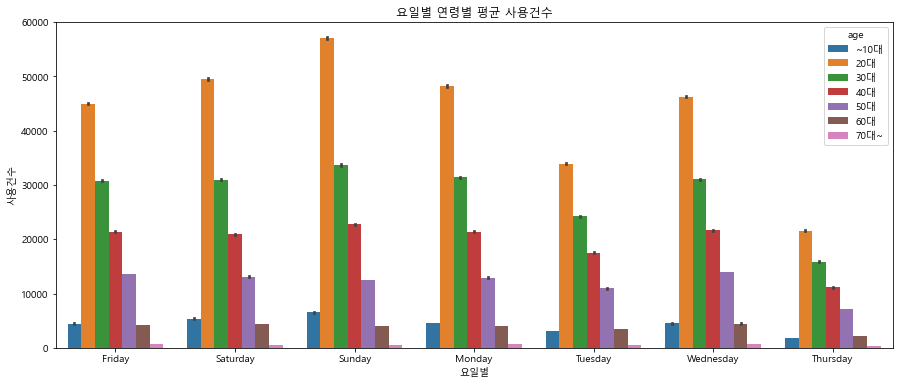

In [139]:
graph_count_day_age()

In [142]:
def graph_count_day_gender():
    plt.figure(figsize=(15,6))
    ax = sns.barplot(data=df,x='weekday',y='count',hue='gender',estimator=sum)
    ax.set(xlabel='요일별',ylabel='사용건수',title='요일별 성별별 평균 사용건수')
    plt.savefig('요일별 성별별 평균 사용건수')

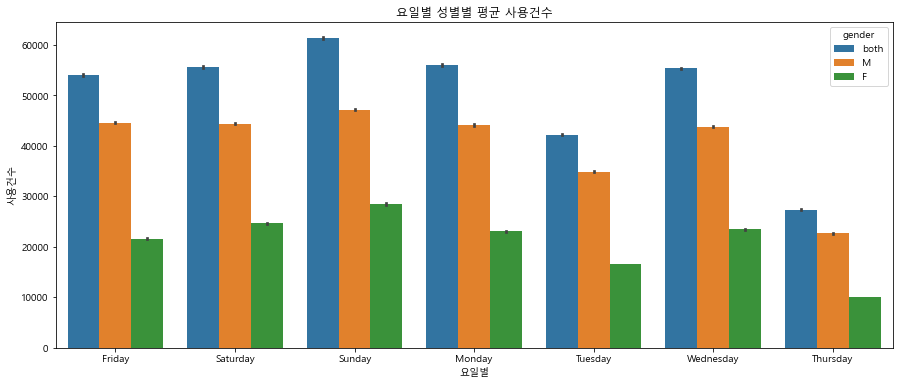

In [143]:
graph_count_day_gender()

In [49]:
# 전처리 끝난 데이터 프레임을 => csv로 만들기
df.to_csv('bikedata_merge.csv')

In [54]:
df_info = pd.read_csv('공공자전거 대여이력 정보.csv',encoding='cp949')
df_info

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-53145,2021-01-02 20:50:36,3,중랑센터,0,2021-01-02 21:15:41,668,서울축산농협(장안지점),0,25,0.00
1,SPB-53074,2021-01-04 16:02:12,3,중랑센터,0,2021-01-04 16:17:06,668,서울축산농협(장안지점),0,14,0.00
2,SPB-50952,2021-01-13 21:02:05,3,중랑센터,0,2021-01-13 21:14:04,668,서울축산농협(장안지점),0,11,1853.99
3,SPB-52380,2021-01-14 21:02:55,3,중랑센터,0,2021-01-14 21:13:41,668,서울축산농협(장안지점),0,10,0.00
4,SPB-52380,2021-01-18 18:02:08,3,중랑센터,0,2021-01-18 18:15:22,540,군자역 7번출구 베스트샵 앞,0,13,2291.05
...,...,...,...,...,...,...,...,...,...,...,...
806498,SPB-81270,2021-01-24 20:13:33,9999,상담센터,0,2021-01-24 20:56:28,2908,광운대학교 중앙도서관,99,42,3730.00
806499,SPB-39891,2021-01-25 12:10:06,9999,상담센터,0,2021-01-25 12:35:20,626,군자교 서측 녹지대,0,25,3680.00
806500,SPB-32679,2021-01-27 14:47:18,9999,상담센터,0,2021-01-27 15:12:45,2299,한전아트센터 앞,0,25,2471.37
806501,SPB-80712,2021-01-31 14:39:45,9999,상담센터,0,2021-01-31 15:46:49,175,홍연2교옆,99,67,4050.00
